<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Intro to Visualization</div>

# Intro to Visualization Final Activity

We've made it this far, congratulations! I hope at this point that you are feeling confident in your ability to deploy python and matplotlib to create informative and attractive data visualizations! You should feel like you have a new tool in your scientific toolkit. I **also** hope that that this semester's activities have helped to reinforce some of your other python skills. The more you practice with things like loops, conditionals, and the various python data structures (lists, dictionaries, and dataframes) the less daunting they seem. As I've said many times, you can always look up the syntax again later, but every time you complete one of these notebooks you are building up base skills in computational thinking that I think will allow you to problem-solve in your own projects someday. 

So let's give you a chance to show off!

I've included a dataset in this folder called `BioMar.csv`. Your challenge is to summarize that data set using visualizations to create a set of figures that tell the 'story' of the data as you see it. Within the data folder I have included a an article (along with its supplementary data file) that describes this recent data from the marine zone of Area de Conservación Guanacaste (you'll see on the first page of the paper that this is part of a special issue of the journal Biotropica that I was involved in producing). The paper is describing the results of a new biodiversity surveying effort. The main concern is documenting previously undocumented marine species within the conservation area. 

Your answer should include AT LEAST one each of: 

* pie chart
* histogram
* bar plot
* scatter plot 
* box plot* 
* heat map 
* annotated figure
* multi-plot layout

and for each individual plot that you make your code should export the figure as a .pdf file named `LastName_Fig_X.pdf` where `LastName` is your last name and `X` is the number for each figure. 

The data that I have given you is drawn from the tables in the paper and the supplementary material. 

    Biomar_samples:  the total organisms collected from within the particular taxonomic group 
    
    Biomar_species:  the number of unique species found in the sample
    
    Poss_New_species: species in the sample that are undescribed (new to science) 
    
    New_to_ACG:  speciesin the sample not previously known to occur in ACG 	
    
    New_to_Costa_Rica:  species in the sample not previously known to occur in Costa Rica 	
  
    Total_species_ACG:  previous species count know to occur in ACG plus 'New_to_ACG'



Two further notes: 

1. You don't have all the variables that you need to plot in order to answer some obvious questions. For example, you don't know how many species had been documented for the ACG before this effort, *but* you can calculate it given what you have.

2. There are a few rows in the data that need to be handled differently than others. For example, there is a row for the TOTAL number of Crustaceans. We need that because the data on Total_species_ACG isn't broken down into subgroups. So for some comparisons you will have to use some subsets of the rows and for other comparisons you will have to add up different subsets. I'll let you figure out how to do this, but do this subsetting within python to practice your pandas skills (in other words, don't just go into Excel and make two separate datasets -- even this would probably be the easiest thing to do). 


\* The box plot will be the hardest thing to figure out. For this in particular you may want to think about how you can create different values by combining the existing columns in different ways. For example, you may want to plot some variables that aren't just driven by the large differences in sample size.  


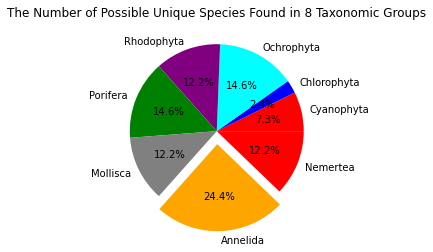

In [18]:
# pie chart
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

pie = ([3,1,6,5,6,5,10,5])
lab = ('Cyanophyta','Chlorophyta','Ochrophyta','Rhodophyta','Porifera','Mollisca','Annelida','Nemertea')
exp = [0,0,0,0,0,0,.15,0]
col = ['red', 'blue', 'cyan','purple','green', 'grey', 'orange']

plt.pie(pie, labels = lab, colors = col,explode = exp, autopct='%1.1f%%')
plt.title('The Number of Possible Unique Species Found in 8 Taxonomic Groups')

plt.show()

plt.savefig('Farruggio_Fig_1.pdf')

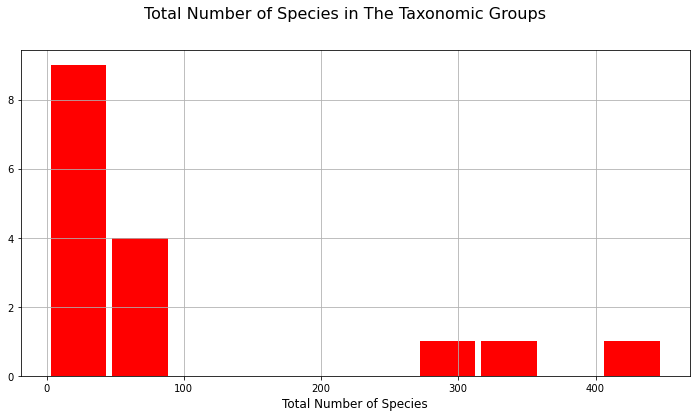

<Figure size 432x288 with 0 Axes>

In [33]:
#histogram
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

BioMarData = pd.read_csv('data/BioMar.csv')
BioMar = BioMarData[~BioMarData['Taxonomic _group'].str.contains("_") | BioMarData['Taxonomic _group'].str.contains("TOTAL")]
fig= plt.figure(figsize = (12,6))
plt.subplot(1,1,1)
plt.hist(BioMar['Total_species_ACG'], rwidth = .9, color = 'red')
plt.xlabel('Total Number of Species', size=12)

fig.suptitle('Total Number of Species in The Taxonomic Groups', size = 16)
plt.grid()
plt.show()

plt.savefig('Farruggio_Fig_2.pdf')

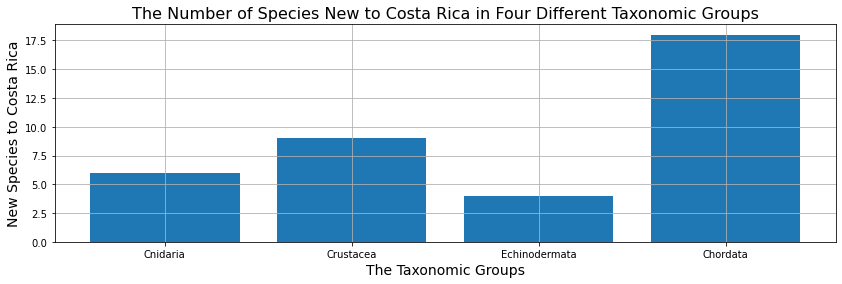

<Figure size 432x288 with 0 Axes>

In [44]:
,,#barplot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14,4))  

Data = {'Taxonomic': ['Cnidaria','Crustacea','Echinodermata','Chordata'],'New_Species_to_Costa_Rica':[6,9,4,18]}
df = pd.DataFrame(Data,columns=['Taxonomic','New_Species_to_Costa_Rica'])


plt.bar(df['Taxonomic'], df['New_Species_to_Costa_Rica'])

plt.ylabel('New Species to Costa Rica', fontsize = 14)
plt.xlabel('The Taxonomic Groups', fontsize = 14)
plt.title('The Number of Species New to Costa Rica in Four Different Taxonomic Groups', fontsize = 16)
plt.grid()
plt.show()

plt.savefig('Farruggio_Fig_3.pdf')

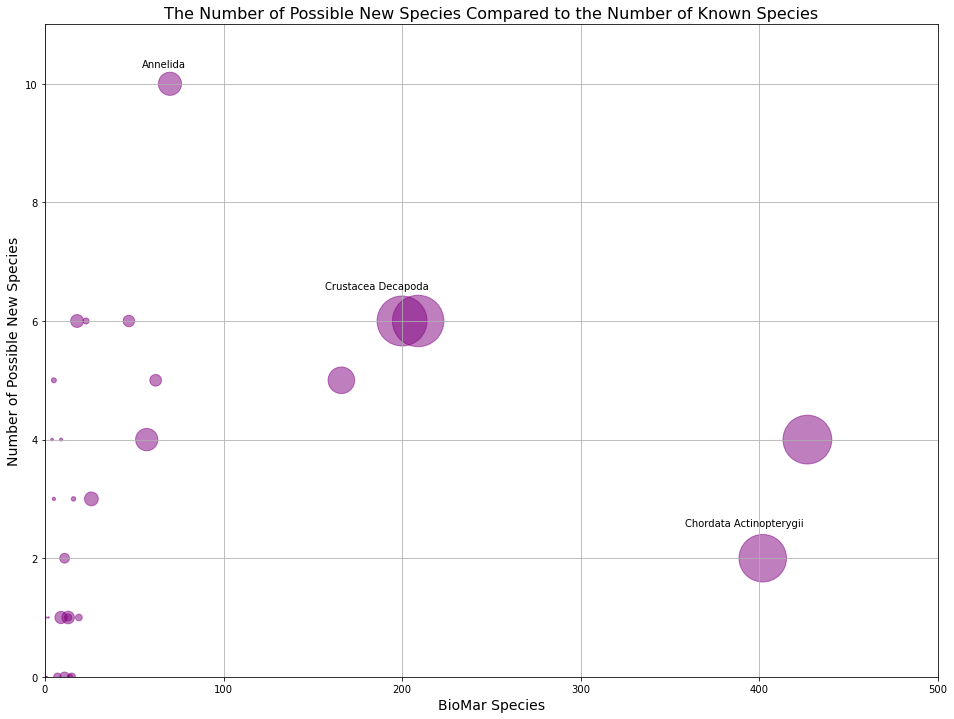

<Figure size 432x288 with 0 Axes>

In [72]:
#scatterplot
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats  

BioMar = pd.read_csv('data/BioMar.csv')
x = BioMar['Biomar_species']
y = BioMar['Poss_New_species']
z = BioMar['Biomar_samples']
c = BioMar['Taxonomic _group']
fig = plt.figure(figsize = (16,12))
ax = plt.axes()

plt.scatter (x,y, s = z, alpha = .5, color = 'purple')
plt.ylim(0,11)
plt.xlim(0,500)

ax.annotate('Crustacea Decapoda', xy=(215,6.5), xycoords = 'data', horizontalalignment = 'right', verticalalignment = 'bottom')
ax.annotate('Chordata Actinopterygii', xy=(425,2.5), xycoords = 'data', horizontalalignment = 'right', verticalalignment = 'bottom')
ax.annotate('Annelida', xy=(79,10.25),xycoords = 'data', horizontalalignment = 'right', verticalalignment = 'bottom')

 
plt.ylabel('Number of Possible New Species', fontsize = 14)
plt.xlabel('BioMar Species', fontsize = 14)
plt.title('The Number of Possible New Species Compared to the Number of Known Species', fontsize = 16)

plt.grid(True)
plt.show()

plt.savefig('Farruggio_Fig_4.pdf')


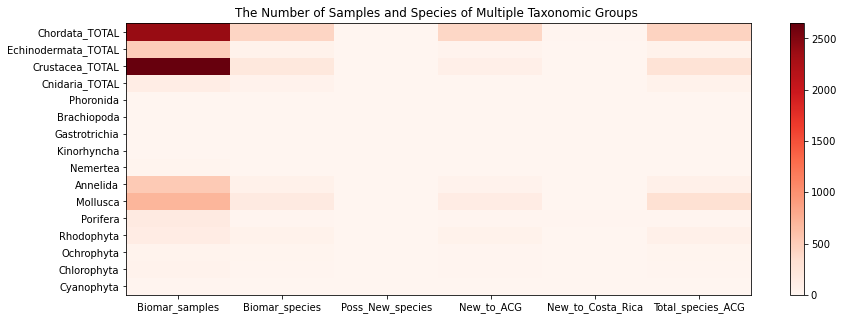

In [57]:
#heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig = plt.figure(figsize = (14,5))

BioMarData = pd.read_csv('data/BioMar.csv')
BioMar = BioMarData[~BioMarData['Taxonomic _group'].str.contains("_") | BioMarData['Taxonomic _group'].str.contains("TOTAL")]
BioMar = BioMar.set_index('Taxonomic _group')
ax = plt.subplot()
plt.pcolormesh(BioMar, cmap = 'Reds')

plt.xticks(np.linspace(.5, len(BioMar.columns)-.5, len(BioMar.columns)), BioMar.columns)
plt.yticks(np.linspace(.5, len(BioMar.index)-.5, len(BioMar.index)), BioMar.index)

plt.title('The Number of Samples and Species of Multiple Taxonomic Groups ')

plt.colorbar()
plt.show()

plt.savefig('Farruggio_Fig_5.pdf')

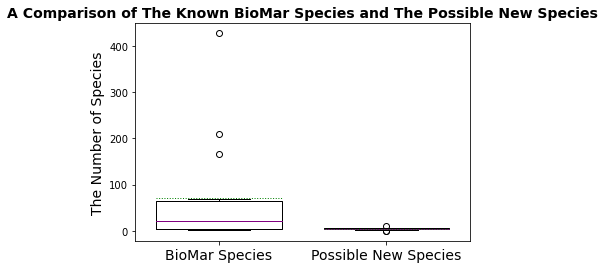

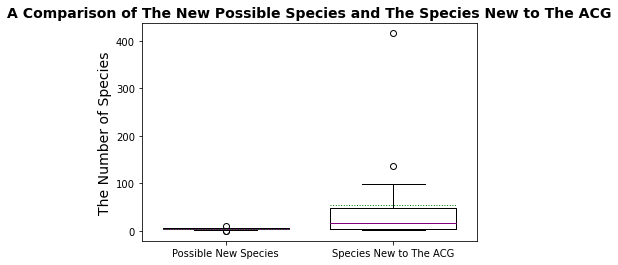

<Figure size 432x288 with 0 Axes>

In [6]:
#boxplot + multigraph layout
import pandas as pd
import matplotlib.pyplot as plt

BioMarData = pd.read_csv('data/BioMar.csv')
BioMar = BioMarData[~BioMarData['Taxonomic _group'].str.contains("_") | BioMarData['Taxonomic _group'].str.contains("TOTAL")]

data=[BioMar['Biomar_species'], BioMar['Poss_New_species']]
xticks_lab = ['BioMar Species', 'Possible New Species']

median_line = {'color':'purple'}
mean_line = {'color':'green','linestyle':'dotted'}
fig, ax = plt.subplots()
plt.boxplot(data, widths = .75, showmeans = True, meanline = True, meanprops = mean_line, medianprops = median_line)

plt.xticks([1,2], xticks_lab, fontsize = 14)
plt.ylabel('The Number of Species', fontsize = 14)
plt.title('A Comparison of The Known BioMar Species and The Possible New Species', fontsize = 14, fontweight = 'bold')

data=[BioMar['Poss_New_species'], BioMar['New_to_ACG']]
xticks_lab = ['Possible New Species', 'Species New to The ACG']

median_line = {'color':'purple'}
mean_line = {'color':'green','linestyle':'dotted'}
fig, ax = plt.subplots()
plt.boxplot(data, widths = .75, showmeans = True, meanline = True, meanprops = mean_line, medianprops = median_line)
       
plt.xticks([1,2], xticks_lab, fontsize = 10)
plt.ylabel('The Number of Species', fontsize = 14)
plt.title('A Comparison of The New Possible Species and The Species New to The ACG', fontsize = 14, fontweight = 'bold')

plt.show()

plt.savefig('Farruggio_Fig_6.pdf')


![TJU logo](images/TJU_logo_image.png "TJU logo")

